<a href="https://colab.research.google.com/github/Karth30/MoneyHeist/blob/main/P01_Project_115860.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIBIL SCORE

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['Customer_Infor1.csv']))

Saving Customer_Infor1.csv to Customer_Infor1.csv


In [ ]:
label = LabelEncoder()
dataset['Gender'] = label.fit_transform(dataset['Gender'])
dataset

,RowNumber,CustomerId,Surname,CreditScore,Gender,Tenure,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,2,42,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,1,41,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,8,42,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,2,43,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,5,39,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,10,35,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,7,36,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,3,42,75075.31,2,1,0,92888.52,1


Feature selection - Taking the top 5 impactful and relevent features

In [ ]:
k_best_features = 10
bestfeatures = SelectKBest(score_func=chi2, k=k_best_features)

Y= dataset["CreditScore"]
X = dataset[["Gender", "Tenure", "Age", "Balance", "NumOfProducts","HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]]
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(5,'Score'))

             Specs         Score
3          Balance  2.244640e+07
7  EstimatedSalary  1.612175e+07
2              Age  1.389338e+03
1           Tenure  7.263904e+02
8           Exited  4.062853e+02


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


 Functions to
 1. compile, train, and evaluate a model
 2. Plot the Testloss and Trainloss

In [ ]:
#Function to compile,train, and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=100, batch_size=32):
    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred, history

In [ ]:
def plot_loss(history, model_name):
    # Plotting training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'Training and Test Loss for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
y= dataset["CreditScore"]
X = dataset[["Balance","EstimatedSalary","Age","Tenure","Exited"]]

Scaling the dataset for ANN and RNN, LSTM

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape for RNN (3D format required for RNNs)
X_train_scaled_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

##ANN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Small ANN (2 layers)
ann_small = Sequential()
ann_small.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
ann_small.add(Dense(8, activation='relu'))
ann_small.add(Dense(1))  # Output layer


In [ ]:
# Medium ANN(4 Layers)
ann_medium = Sequential()
ann_medium.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
ann_medium.add(Dense(16, activation='relu'))
ann_medium.add(Dense(8, activation='relu'))
ann_medium.add(Dense(1))  # Output layer


ANN Medium Model has the least MAE. SO dropout method is being used to tackle the issue of overfitting for this model

Before Overfitting, MAE:
1. Small ANN - 0.80481
2. **Medium ANN - 0.80049**
3. Large ANN - 0.8169
4. Small RNN - 0.80227
5. Medium RNN - 0.80273
6. Large RNN - 0.80055
7. Small LSTM -  0.80068
8. Medium LSTM - 0.80135
9. Large LSTM - 0.80086

After Overfitting, MAE,
Medium ANN - 0.80044

In [ ]:
# Medium ANN(4 Layers)
ann_medium_of = Sequential()
ann_medium_of.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
ann_medium_of.add(Dropout(0.4))
ann_medium_of.add(Dense(16, activation='relu'))
ann_medium_of.add(Dropout(0.4))
ann_medium_of.add(Dense(8, activation='relu'))
ann_medium_of.add(Dropout(0.4))
ann_medium_of.add(Dense(1))  # Output layer


In [ ]:
# Large ANN()
ann_large = Sequential()
ann_large.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann_large.add(Dense(32, activation='relu'))
ann_large.add(Dense(16, activation='relu'))
ann_large.add(Dense(8, activation='relu'))
ann_large.add(Dense(8, activation='relu'))
ann_large.add(Dense(1))  # Output layer


##RNN


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Small RNN
rnn_small = Sequential()
rnn_small.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled_rnn.shape[2])))
rnn_small.add(SimpleRNN(64, activation='relu'))
rnn_small.add(Dense(1))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Medium RNN
rnn_medium = Sequential()
rnn_medium.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled_rnn.shape[2])))
rnn_medium.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_medium.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_medium.add(SimpleRNN(64, activation='relu'))
rnn_medium.add(Dense(1))  # Output layer


In [ ]:
# Large RNN
rnn_large = Sequential()
rnn_large.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled_rnn.shape[2])))
rnn_large.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_large.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_large.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_large.add(SimpleRNN(64, activation='relu'))
rnn_large.add(Dense(1))  # Output layer


##LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Small LSTM
lstm_small = Sequential()
lstm_small.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled_rnn.shape[2])))
lstm_small.add(LSTM(25, activation='relu'))
lstm_small.add(Dense(1))


In [ ]:
# Medium LSTM
lstm_medium = Sequential()
lstm_medium.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled_rnn.shape[2])))
lstm_medium.add(LSTM(50, activation='relu', return_sequences=True))
lstm_medium.add(LSTM(50, activation='relu', return_sequences=True))
lstm_medium.add(LSTM(25, activation='relu'))
lstm_medium.add(Dense(1))



In [ ]:
# Large LSTM
lstm_large = Sequential()
lstm_large.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled_rnn.shape[2])))
lstm_large.add(LSTM(50, activation='relu', return_sequences=True))
lstm_large.add(LSTM(50, activation='relu', return_sequences=True))
lstm_large.add(LSTM(50, activation='relu', return_sequences=True))
lstm_large.add(LSTM(25, activation='relu', return_sequences=True))
lstm_large.add(LSTM(25, activation='relu'))
lstm_large.add(Dense(1))


##Running the models


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN Small Model - MSE: 0.99136, MAE: 0.80435
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN Medium Model - MSE: 1.00181, MAE: 0.80595
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
ANN Medium Model OF - MSE: 0.98020, MAE: 0.80072
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN Large Model - MSE: 1.03072, MAE: 0.81758


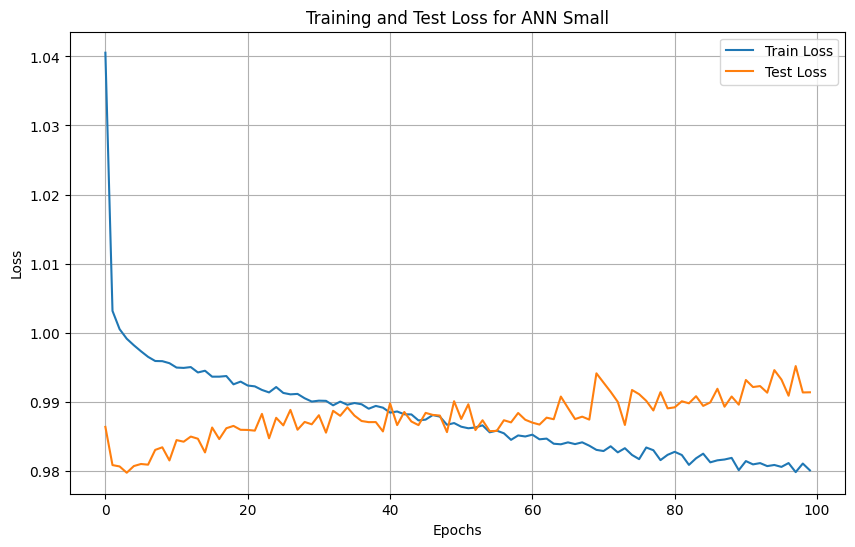

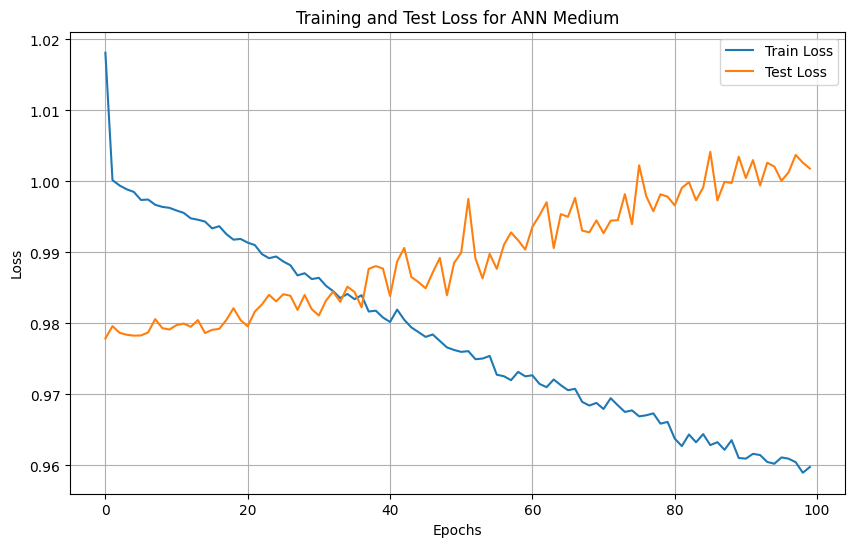

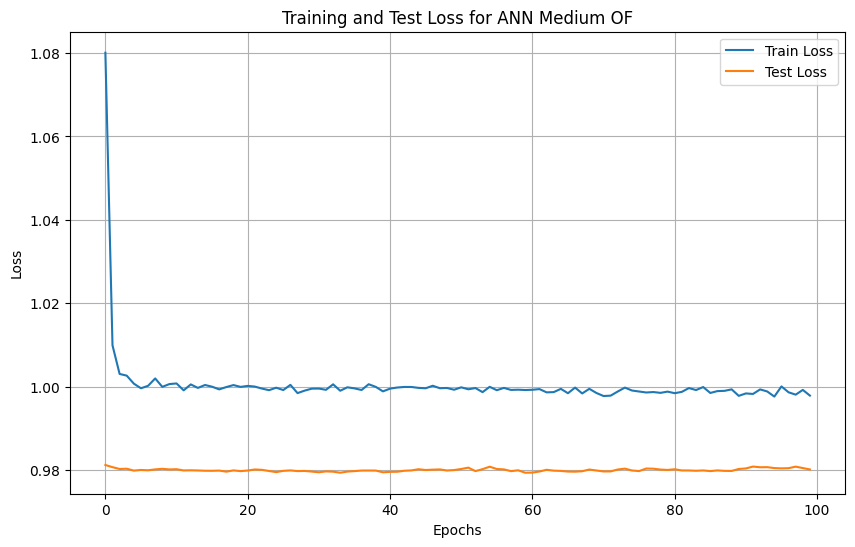

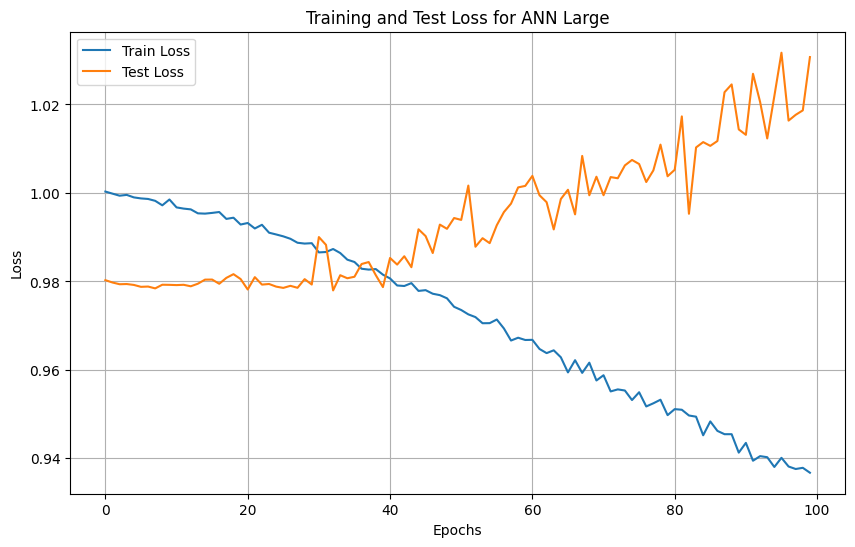

In [ ]:
# Train and evaluate each model for ANN
mse_ann_small, mae_ann_small, y_pred_ann_small, history_ann_small = train_and_evaluate(ann_small, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
print(f"ANN Small Model - MSE: {mse_ann_small:.5f}, MAE: {mae_ann_small:.5f}")
mse_ann_medium, mae_ann_medium, y_pred_ann_medium, history_ann_medium = train_and_evaluate(ann_medium, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
print(f"ANN Medium Model - MSE: {mse_ann_medium:.5f}, MAE: {mae_ann_medium:.5f}")

mse_ann_medium_of, mae_ann_medium_of, y_pred_ann_medium_of, history_ann_medium_of = train_and_evaluate(ann_medium_of, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
print(f"ANN Medium Model OF - MSE: {mse_ann_medium_of:.5f}, MAE: {mae_ann_medium_of:.5f}")

mse_ann_large, mae_ann_large, y_pred_ann_large, history_ann_large = train_and_evaluate(ann_large, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)
print(f"ANN Large Model - MSE: {mse_ann_large:.5f}, MAE: {mae_ann_large:.5f}")


# Plot_loss function for each model after training
plot_loss(history_ann_small, 'ANN Small')
plot_loss(history_ann_medium, 'ANN Medium')
plot_loss(history_ann_medium_of, 'ANN Medium OF')
plot_loss(history_ann_large, 'ANN Large')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
RNN Smalll Model - MSE: 1.02376, MAE: 0.81717
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
RNN medium Model - MSE: 1.15397, MAE: 0.85934
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
RNN large Model - MSE: 1.24156, MAE: 0.88726


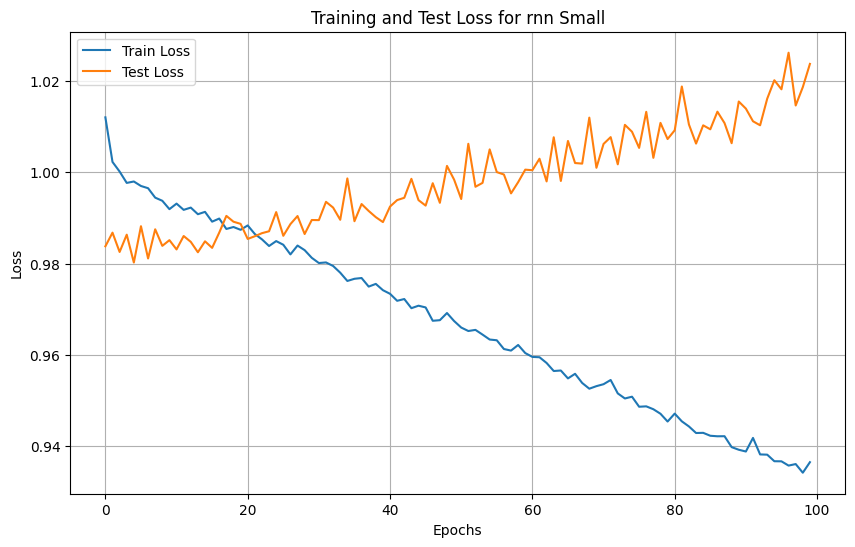

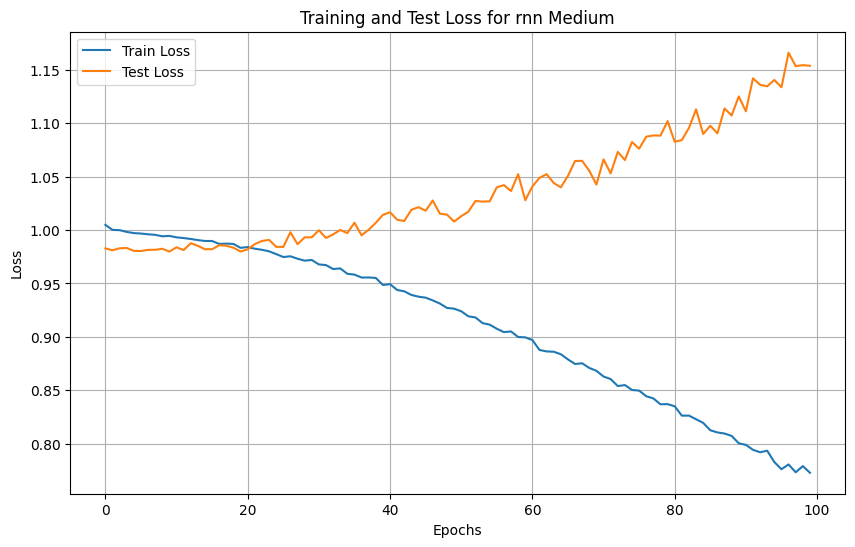

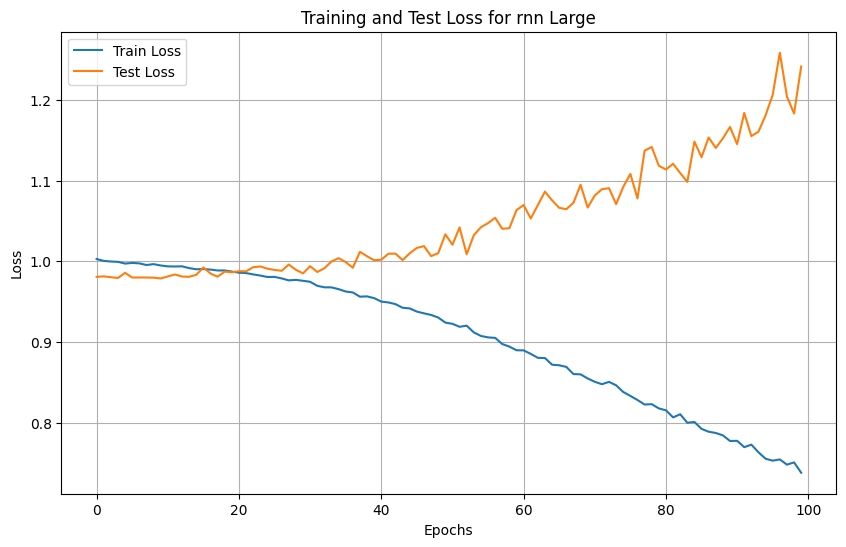

In [ ]:
# Train and evaluate each model for RNN
mse_rnn_small, mae_rnn_small, y_pred_rnn_small, history_rnn_small = train_and_evaluate(rnn_small, X_train_scaled_rnn, y_train_scaled, X_test_scaled_rnn, y_test_scaled)
print(f"RNN Smalll Model - MSE: {mse_rnn_small:.5f}, MAE: {mae_rnn_small:.5f}")
mse_rnn_medium, mae_rnn_medium, y_pred_rnn_medium, history_rnn_medium = train_and_evaluate(rnn_medium, X_train_scaled_rnn, y_train_scaled, X_test_scaled_rnn, y_test_scaled)
print(f"RNN medium Model - MSE: {mse_rnn_medium:.5f}, MAE: {mae_rnn_medium:.5f}")
mse_rnn_large, mae_rnn_large, y_pred_rnn_large, history_rnn_large = train_and_evaluate(rnn_large, X_train_scaled_rnn, y_train_scaled, X_test_scaled_rnn, y_test_scaled)
print(f"RNN large Model - MSE: {mse_rnn_large:.5f}, MAE: {mae_rnn_large:.5f}")



# Plot_loss function for each model after training
plot_loss(history_rnn_small, 'rnn Small')
plot_loss(history_rnn_medium, 'rnn Medium')
plot_loss(history_rnn_large, 'rnn Large')

In [ ]:
# Train and evaluate each model for LSTM
mse_lstm_small, mae_lstm_small, y_pred_lstm_small, history_lstm_small = train_and_evaluate(lstm_small, X_train_scaled_rnn, y_train_scaled, X_test_scaled_rnn, y_test_scaled)
print(f"lstm Smalll Model - MSE: {mse_lstm_small:.5f}, MAE: {mae_lstm_small:.5f}")
mse_lstm_medium, mae_lstm_medium, y_pred_lstm_medium, history_lstm_medium = train_and_evaluate(lstm_medium, X_train_scaled_rnn, y_train_scaled, X_test_scaled_rnn, y_test_scaled)
print(f"LSTM medium Model - MSE: {mse_lstm_medium:.5f}, MAE: {mae_lstm_medium:.5f}")
mse_lstm_large, mae_lstm_large, y_pred_lstm_large, history_lstm_large = train_and_evaluate(lstm_large, X_train_scaled_rnn, y_train_scaled, X_test_scaled_rnn, y_test_scaled)
print(f"LSTM large Model - MSE: {mse_lstm_large:.5f}, MAE: {mae_lstm_large:.5f}")

# Plot_loss function for each model after training
plot_loss(history_lstm_small, 'LSTM Small')
plot_loss(history_lstm_medium, 'LSTM Medium')
plot_loss(history_lstm_large, 'LSTM Large')


##Prediction


X = dataset[["Balance","EstimatedSalary","Age","Tenure","Exited"]]

Predicting the model with unseen dataset


In [ ]:
import numpy as np
unseen_data = np.array([[83807.86 , 112542.58 , 41 ,1, 0 ]])

In [ ]:
# Scale the unseen data
unseen_data_scaled = scaler_X.transform(unseen_data)
y_ann_medium_of = ann_medium_of.predict(X_train_scaled)
predicted_credit_score_ann_medium_of = scaler_y.inverse_transform(y_ann_medium_of)
print("Credit Score of unseen data (ANN medium model overfitted): ", predicted_credit_score_ann_medium_of[0][0])